# INFO 371 Lab 3: Train/Test Splits

#### Instructions

Please submit your completed lab notebook by the deadline. Working together is fun and useful but you must submit your own work. Discussing the solutions and problems with your instructors and classmates is completely fine. However, **do not** copy and paste their solution(s). Remember - your code/work should not appear (directly or indirectly) on any one else's machine and vice versa. 


#### Introduction
Your task is to set up a machine learning experiment using the [Ames Housing Prices dataset](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627). You can find more on the dataset [here](https://jse.amstat.org/v19n3/decock/DataDocumentation.txt) and the data is available [here](http://jse.amstat.org/v19n3/decock/AmesHousing.xls) (HINT: copy the link to the dataset and import directly into pandas as a .xls file).

### Part 1: Data preparation

To start, let's prepare the data. This will have several steps

#### 1. Load the data.

In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('http://jse.amstat.org/v19n3/decock/AmesHousing.xls')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#### 2. Select the variables you need: Lot Area, Overall Qual, Overall Cond, Bedroom AbvGr, Full Bath, Half Bath, Sale Condition, SalePrice.

In [3]:
data_filtered = data[["Lot Area", "Overall Qual", "Overall Cond", "Bedroom AbvGr", "Full Bath", "Half Bath", "Sale Condition", "SalePrice"]]
data_filtered.head()

,Lot Area,Overall Qual,Overall Cond,Bedroom AbvGr,Full Bath,Half Bath,Sale Condition,SalePrice
0,31770,6,5,3,1,0,Normal,215000
1,11622,5,6,2,1,0,Normal,105000
2,14267,6,6,3,1,1,Normal,172000
3,11160,7,5,3,2,1,Normal,244000
4,13830,5,5,3,2,1,Normal,189900


#### 3. Explain what each of the selected variables mean. Do you think all the variables are relevant to the sale price of a home?

**Lot Area**: The square footage of a home
**Overall Qual**: Rates the overall material and finish of a home
**Overall Cond**: Rates the overall condition of a home
**Bedroom AbvGr**: Number of bedrooms that are above grade in a home
**Full Bath**: Number of full bathrooms that are above grade in a home
**Half Bath**: Number of half bedrooms that are above grade in a home
**Sale Condition**: The condition of a sale for the home (i.e., how was the home sold)
**SalePrice**: Sale price of a home in USD

I think these are all relevant to predicting the sale price of a home because each variable is a factor homeowners consider before purchasing a home

#### 4. Remove any rows with missing values. How many did you remove?

In [4]:
data_filtered.shape

(2930, 8)

In [5]:
data_filtered = data_filtered.dropna()
data_filtered.shape

(2930, 8)

There are no missing values as dropna() did not remove any rows. There are 2,930 rows in our dataset. We can confirm there are no nulls with the analysis below

In [6]:
data_filtered.isna().sum()

Lot Area          0
Overall Qual      0
Overall Cond      0
Bedroom AbvGr     0
Full Bath         0
Half Bath         0
Sale Condition    0
SalePrice         0
dtype: int64

In [7]:
data_filtered["Lot Area"].min(), data_filtered["Lot Area"].max()

(np.int64(1300), np.int64(215245))

In [8]:
data_filtered["SalePrice"].min(), data_filtered["SalePrice"].max()

(np.int64(12789), np.int64(755000))

## Part 2. Create train-test splits

#### 1. Create splits

Use sklearn's `train_test_split` function to create a training and test split for the explanatory and response variables (y = 'SalePrice', X = everything else). Use a random seed (`random_state`) of '11' for the function with a 80-20 train/test split.

NOTE: You may need to re-run the kernel after everything is working so the output using a seed of 11 is as expected. Your first index in the X_train dataset should be 2554.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = data_filtered["SalePrice"]
X = data_filtered.drop(columns="SalePrice")

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
X_train.head(1)

,Lot Area,Overall Qual,Overall Cond,Bedroom AbvGr,Full Bath,Half Bath,Sale Condition
2554,4712,4,7,3,1,1,Abnorml


#### 2. What is the purpose of using a consistent seed when splitting?

Reproducability of the data when comparing models for a reliable comparison

#### 3. What are the dimensions of your X_train and X_test data sets?

In [12]:
X_train.shape

(2344, 7)

In [13]:
X_test.shape

(586, 7)

Our X_train data set has 2,344 rows, and the X_test has 586 rows. Both have the same features

## Part 3. Compare splits

#### 1. Compare means and std devs

How do the mean and standard deviation of the variables in your X_train and X_test datasets compare to the mean and standard deviation across the entire dataset?

In [14]:
sale_condition_mapping = {
    'Normal': 1,
    'Abnorml': 2,
    'AdjLand': 3,
    'Alloca': 4,
    'Family': 5,
    'Partial': 6
}

In [15]:
X_train['Sale Condition Converted'] = X_train['Sale Condition'].map(sale_condition_mapping)
X_test['Sale Condition Converted'] = X_test['Sale Condition'].map(sale_condition_mapping)
data_filtered['Sale Condition Converted'] = data_filtered['Sale Condition'].map(sale_condition_mapping)

X_train = X_train.drop(columns="Sale Condition")
X_test = X_test.drop(columns="Sale Condition")
data_filtered = data_filtered.drop(columns="Sale Condition")

X_train.head()

,Lot Area,Overall Qual,Overall Cond,Bedroom AbvGr,Full Bath,Half Bath,Sale Condition Converted
2554,4712,4,7,3,1,1,2
1559,5587,8,5,2,2,0,6
201,10300,7,6,3,2,0,1
1395,10532,5,3,3,2,0,2
1907,11345,5,5,4,2,0,1


In [16]:
X_train_means = X_train.mean()
X_train_std = X_train.std()
X_test_means = X_test.mean() 
X_test_std = X_train.std()

In [17]:
X_train_means

Lot Area                    10157.740188
Overall Qual                    6.097270
Overall Cond                    5.554181
Bedroom AbvGr                   2.851109
Full Bath                       1.572099
Half Bath                       0.376706
Sale Condition Converted        1.593857
dtype: float64

In [18]:
X_test_means

Lot Area                    10108.648464
Overall Qual                    6.085324
Overall Cond                    5.598976
Bedroom AbvGr                   2.866894
Full Bath                       1.544369
Half Bath                       0.390785
Sale Condition Converted        1.517065
dtype: float64

In [19]:
X_train_std

Lot Area                    8454.252782
Overall Qual                   1.432478
Overall Cond                   1.131386
Bedroom AbvGr                  0.825086
Full Bath                      0.553503
Half Bath                      0.502817
Sale Condition Converted       1.486509
dtype: float64

In [20]:
X_test_std

Lot Area                    8454.252782
Overall Qual                   1.432478
Overall Cond                   1.131386
Bedroom AbvGr                  0.825086
Full Bath                      0.553503
Half Bath                      0.502817
Sale Condition Converted       1.486509
dtype: float64

In [21]:
data_filtered.mean()

Lot Area                     10147.921843
Overall Qual                     6.094881
Overall Cond                     5.563140
Bedroom AbvGr                    2.854266
Full Bath                        1.566553
Half Bath                        0.379522
SalePrice                   180796.060068
Sale Condition Converted         1.578498
dtype: float64

In [22]:
data_filtered.std()

Lot Area                     7880.017759
Overall Qual                    1.411026
Overall Cond                    1.111537
Bedroom AbvGr                   0.827731
Full Bath                       0.552941
Half Bath                       0.502629
SalePrice                   79886.692357
Sale Condition Converted        1.470600
dtype: float64

The means and standard deviations are mostly the same between X_train, X_test, and the entire dataset.

#### 2. Plot distributions

Plot three histograms: the sale price for the entire dataset, that for y_train, and that for y_test. How do the distributions compare?

In [23]:
import seaborn as sns

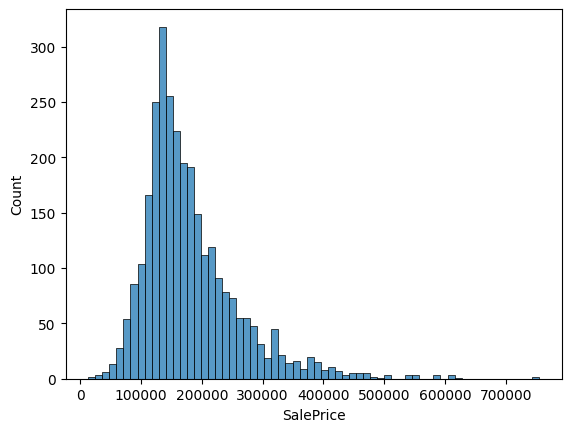

In [24]:
_ = sns.histplot(data["SalePrice"])

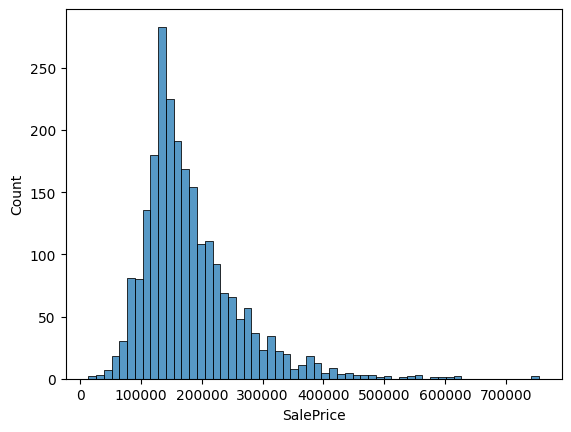

In [25]:
_ = sns.histplot(y_train)

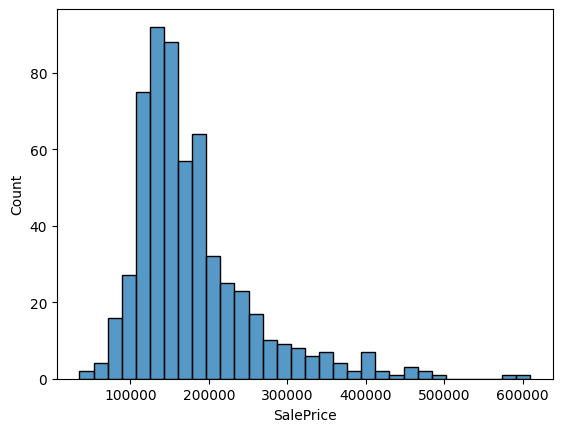

In [26]:
_ = sns.histplot(y_test)

All three distributions are similar. They are right skewed with a minor outlier on the very right side of the distribution.